In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
# 2. Load Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [3]:
# 3. Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder: Compress the image
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 16)
        )
        
        # Decoder: Reconstruct the image
        self.decoder = nn.Sequential(
            nn.Linear(16, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Flatten the input image
        x = x.view(-1, 28*28)
        # Encode and decode
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        # Reshape back to image format
        decoded = decoded.view(-1, 1, 28, 28)
        return decoded

# Initialize model, loss function, optimizer
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [4]:
# 4. Train the Autoencoder
def train(model, loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, _ in loader:  # We don't need the labels for autoencoders
            images = images.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, images)  # Compare the output (reconstructed) with the input

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(loader):.4f}')

In [5]:
# 5. Evaluate the Autoencoder (Visualize Reconstructed Images)
def visualize_reconstruction(model, loader):
    model.eval()
    images, _ = next(iter(loader))
    images = images.to(device)
    with torch.no_grad():
        reconstructed = model(images)

    # Plot the original and the reconstructed images
    fig, axs = plt.subplots(2, 10, figsize=(12, 4))
    for i in range(10):
        # Original images
        axs[0, i].imshow(images[i].cpu().squeeze(), cmap='gray')
        axs[0, i].set_title('Original')
        axs[0, i].axis('off')
        
        # Reconstructed images
        axs[1, i].imshow(reconstructed[i].cpu().squeeze(), cmap='gray')
        axs[1, i].set_title('Reconstructed')
        axs[1, i].axis('off')

    plt.show()

Epoch [1/30], Loss: 0.6440
Epoch [2/30], Loss: 0.6078
Epoch [3/30], Loss: 0.6029
Epoch [4/30], Loss: 0.6007
Epoch [5/30], Loss: 0.5993
Epoch [6/30], Loss: 0.5981
Epoch [7/30], Loss: 0.5971
Epoch [8/30], Loss: 0.5963
Epoch [9/30], Loss: 0.5957
Epoch [10/30], Loss: 0.5953
Epoch [11/30], Loss: 0.5950
Epoch [12/30], Loss: 0.5947
Epoch [13/30], Loss: 0.5944
Epoch [14/30], Loss: 0.5941
Epoch [15/30], Loss: 0.5939
Epoch [16/30], Loss: 0.5936
Epoch [17/30], Loss: 0.5934
Epoch [18/30], Loss: 0.5932
Epoch [19/30], Loss: 0.5930
Epoch [20/30], Loss: 0.5928
Epoch [21/30], Loss: 0.5927
Epoch [22/30], Loss: 0.5925
Epoch [23/30], Loss: 0.5924
Epoch [24/30], Loss: 0.5922
Epoch [25/30], Loss: 0.5921
Epoch [26/30], Loss: 0.5919
Epoch [27/30], Loss: 0.5918
Epoch [28/30], Loss: 0.5917
Epoch [29/30], Loss: 0.5916
Epoch [30/30], Loss: 0.5915


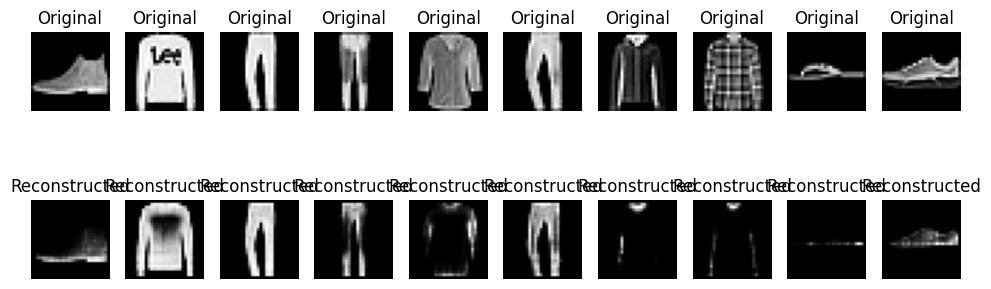

Epoch [1/30], Loss: 0.5915
Epoch [2/30], Loss: 0.5914
Epoch [3/30], Loss: 0.5913
Epoch [4/30], Loss: 0.5912
Epoch [5/30], Loss: 0.5911
Epoch [6/30], Loss: 0.5910
Epoch [7/30], Loss: 0.5910
Epoch [8/30], Loss: 0.5909
Epoch [9/30], Loss: 0.5909
Epoch [10/30], Loss: 0.5907
Epoch [11/30], Loss: 0.5907
Epoch [12/30], Loss: 0.5906
Epoch [13/30], Loss: 0.5906
Epoch [14/30], Loss: 0.5905
Epoch [15/30], Loss: 0.5904
Epoch [16/30], Loss: 0.5904
Epoch [17/30], Loss: 0.5903
Epoch [18/30], Loss: 0.5903
Epoch [19/30], Loss: 0.5902
Epoch [20/30], Loss: 0.5902
Epoch [21/30], Loss: 0.5901
Epoch [22/30], Loss: 0.5901
Epoch [23/30], Loss: 0.5900
Epoch [24/30], Loss: 0.5900
Epoch [25/30], Loss: 0.5900
Epoch [26/30], Loss: 0.5899
Epoch [27/30], Loss: 0.5899
Epoch [28/30], Loss: 0.5899
Epoch [29/30], Loss: 0.5898
Epoch [30/30], Loss: 0.5898


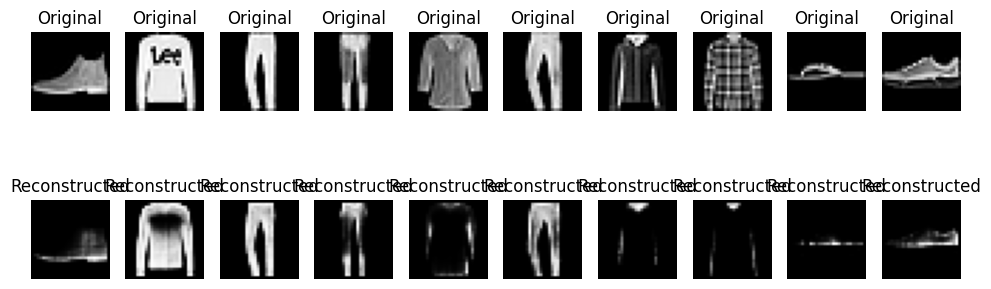

Epoch [1/30], Loss: 0.5898
Epoch [2/30], Loss: 0.5897
Epoch [3/30], Loss: 0.5897
Epoch [4/30], Loss: 0.5896
Epoch [5/30], Loss: 0.5896
Epoch [6/30], Loss: 0.5896
Epoch [7/30], Loss: 0.5895
Epoch [8/30], Loss: 0.5895
Epoch [9/30], Loss: 0.5895
Epoch [10/30], Loss: 0.5894
Epoch [11/30], Loss: 0.5894
Epoch [12/30], Loss: 0.5894
Epoch [13/30], Loss: 0.5894
Epoch [14/30], Loss: 0.5894
Epoch [15/30], Loss: 0.5893
Epoch [16/30], Loss: 0.5893
Epoch [17/30], Loss: 0.5893
Epoch [18/30], Loss: 0.5892
Epoch [19/30], Loss: 0.5892
Epoch [20/30], Loss: 0.5892
Epoch [21/30], Loss: 0.5892
Epoch [22/30], Loss: 0.5891
Epoch [23/30], Loss: 0.5891
Epoch [24/30], Loss: 0.5891
Epoch [25/30], Loss: 0.5891
Epoch [26/30], Loss: 0.5891
Epoch [27/30], Loss: 0.5890
Epoch [28/30], Loss: 0.5890
Epoch [29/30], Loss: 0.5890
Epoch [30/30], Loss: 0.5890


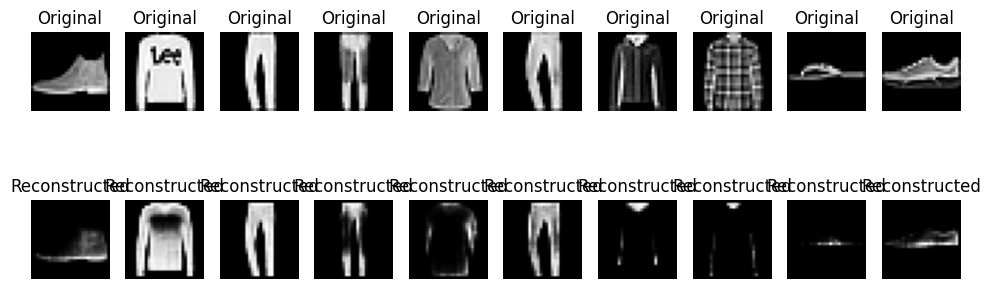

In [6]:
train(model, train_loader, criterion, optimizer, epochs=30)
visualize_reconstruction(model, test_loader)
torch.save(model.state_dict(), 'autoencoder_1.pth')
train(model, train_loader, criterion, optimizer, epochs=30)
visualize_reconstruction(model, test_loader)
torch.save(model.state_dict(), 'autoencoder_2.pth')
train(model, train_loader, criterion, optimizer, epochs=30)
visualize_reconstruction(model, test_loader)
torch.save(model.state_dict(), 'autoencoder_3.pth')